In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train_df = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")
test_df  = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
oil_df  = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
holidays_events_df  = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
stores_df  = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
transactions_df  = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")

In [5]:
display(train_df.head(5))
display(test_df.head(5))
display(oil_df.head(5))
display(holidays_events_df.head(5))
display(stores_df.head(5))
display(transactions_df.head(5))

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [2]:
merged_train_df = pd.merge(train_df, oil_df, on='date', how='left')
merged_train_df = pd.merge(merged_train_df, holidays_events_df, on='date', how='left')
merged_train_df = pd.merge(merged_train_df, stores_df, on='store_nbr', how='left')

merged_train_df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6


In [13]:
merged_train_df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6


In [3]:
#Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Applying level encoding on each column with categorical data
train_ds = merged_train_df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)
test_ds = test_df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


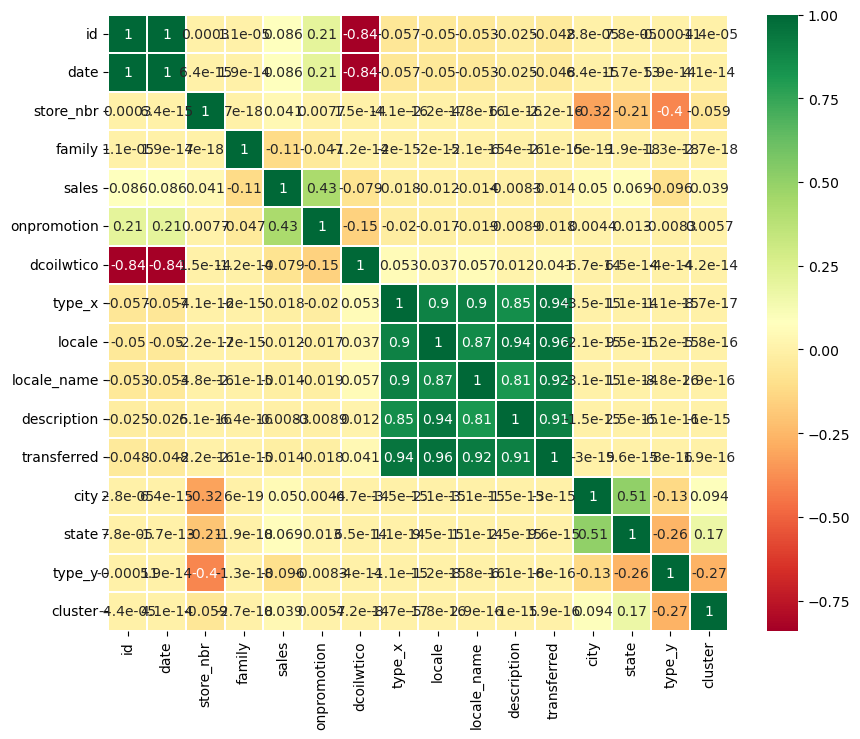

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
'''Correlation Between The Features'''
sns.heatmap(train_ds.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show() 

In [21]:
# Convertir la colonne 'date' en type datetime si elle n'est pas déjà sous ce format
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Extraire le mois dans une nouvelle colonne 'month'
train_df['month'] = train_df['date'].dt.month
test_df['month'] = test_df['date'].dt.month
train_df

,id,date,store_nbr,family,sales,onpromotion,month
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,1
1,1,2013-01-01,1,BABY CARE,0.000,0,1
2,2,2013-01-01,1,BEAUTY,0.000,0,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,1
4,4,2013-01-01,1,BOOKS,0.000,0,1
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,8
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,8
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,8
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,8


In [37]:
train_df[["month", "sales"]].groupby(['month'], as_index=False).mean().sort_values(by='sales', ascending=False)


,month,sales
11,12,453.740370
10,11,375.681762
6,7,374.219111
9,10,362.407132
8,9,362.297418
5,6,353.597842
2,3,352.009294
0,1,341.921554
4,5,341.765820
3,4,339.199841


In [23]:
#Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Applying level encoding on each column with categorical data
train_ds = train_df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)
test_ds = test_df.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

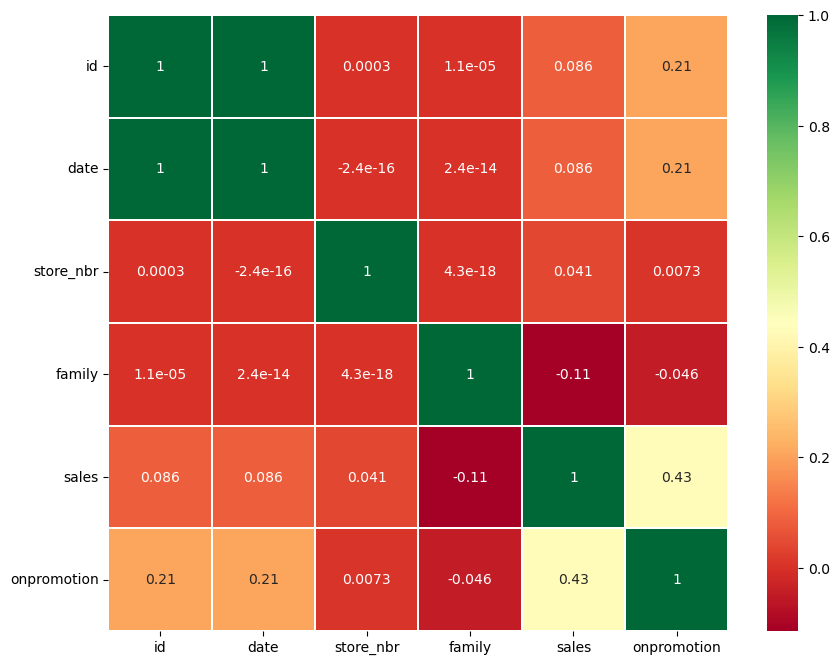

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
'''Correlation Between The Features'''
sns.heatmap(train_ds.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show() 

In [54]:
train_ds

,id,date,store_nbr,family,sales,onpromotion
0,0,0,1,0,0.000,0
1,1,0,1,1,0.000,0
2,2,0,1,2,0.000,0
3,3,0,1,3,0.000,0
4,4,0,1,4,0.000,0
...,...,...,...,...,...,...
3000883,3000883,1683,9,28,438.133,0
3000884,3000884,1683,9,29,154.553,1
3000885,3000885,1683,9,30,2419.729,148
3000886,3000886,1683,9,31,121.000,8


In [32]:
train_ds_2 = train_ds.dropna()
train_ds_2

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [24]:


tergat = train_ds['sales']
X = train_ds[['store_nbr','family','onpromotion','month']]

y = tergat

In [25]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features and y contains the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [26]:
X_train

,store_nbr,family,onpromotion,month
2872381,52,28,0,6
1087696,28,16,0,9
1293659,7,26,0,12
599347,26,1,0,12
1832959,39,7,0,10
...,...,...,...,...
1692743,54,8,0,8
2356330,23,31,0,8
2229084,53,0,0,6
2768307,33,3,15,4


# Liner Refrassion mode design

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Create and train the linear regression model
model =LinearRegression(
    fit_intercept=True,  # Whether to calculate the intercept (bias) of the model
    copy_X=True,         # Whether to copy the input features; set to False for memory optimization
    n_jobs=None          # Number of CPU cores to use for calculations (-1 uses all available cores)
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 975857.523742248
R-squared Score: 0.194316257757843


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb


# Create and train the linear regression model
model = xgb.XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size at each boosting round
    max_depth=15,        # Maximum depth of each tree
    random_state=42     # Random seed for reproducibility
)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 206227.50119662276
R-squared Score: 0.8297352422101836


# Submission

In [36]:
test_ds

,id,date,store_nbr,family,onpromotion
0,3000888,0,1,0,0
1,3000889,0,1,1,0
2,3000890,0,1,2,2
3,3000891,0,1,3,20
4,3000892,0,1,4,0
...,...,...,...,...,...
28507,3029395,15,9,28,1
28508,3029396,15,9,29,0
28509,3029397,15,9,30,1
28510,3029398,15,9,31,9


In [33]:
# Make predictions on the test set
y_pred = model.predict(test_ds[['store_nbr','family','onpromotion','month']])
y_pred

array([ 3.2131815e+00, -7.5857639e-03,  3.7683479e+01, ...,
        1.2786472e+03,  1.2953584e+02,  1.3413887e+01], dtype=float32)

In [34]:


sub_dic = {
    "id": test_df['id'].values,
    "sales": y_pred
}
# dic to df convert

sub_df = pd.DataFrame(sub_dic)
sub_df.head(5)

,id,sales
0,3000888,3.213181
1,3000889,-0.007586
2,3000890,37.683479
3,3000891,1008.643433
4,3000892,-0.360308


In [35]:
sub_df.to_csv("sub_10.csv", index=False)